In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
s0=100.
E=100.
T=1.0
r=0.05
sigma=0.2
simulation=1000
M=252
dt=T/M
Fixed_call_Geometric=0
Fixed_put_Geometric=0
Floating_call_Geometric=0
Floating_put_Geometric=0
discounting_factor=(np.exp(-r*T))
count=0
discrete=5
data_Fixed_call={}
data_Floating_call={}
data_Fixed_put={}
data_Floating_put={}
no_of_simulations='No of Simulations'
call_values='Call Values'
put_values='Put Values'

for j in range(0, simulation):
    sum_s=0
   # product_s=1
    s=s0
    for i in range(0, M):
        e=np.random.normal()            
        s=s*(1+r*dt+sigma*np.sqrt(dt)*e)
        if(i%discrete==(discrete-1)):
            sum_s+=np.log(s)
            count+=1
    
    Average_st=np.exp(sum_s/count)
    count=0
    fixed_call_val={j: max(Average_st-E,0)}
    floating_call_val={j: max(s-Average_st,0)}
    fixed_put_val={j: max(E-Average_st,0)}
    floating_put_val={j: max(Average_st-s,0)}
    data_Fixed_call.update(fixed_call_val)
    data_Floating_call.update(floating_call_val)
    data_Fixed_put.update(fixed_put_val)
    data_Floating_put.update(floating_put_val)
    Fixed_call_Geometric+=max(Average_st-E,0)    
    Floating_call_Geometric+=max(s-Average_st,0)
    Fixed_put_Geometric+=max(E-Average_st,0)
    Floating_put_Geometric+=max(Average_st-s,0) 

In [5]:
def myplots(dictionary,simulation,title,xlabel,ylabel):
    plt.plot(list(dictionary.keys()), list(dictionary.values()), '.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axis([0, simulation, 0, 100])
    plt.show()

Fixed_call_Geometric 5.444720125702179
Standard error Fixed_call_Geometric 0.25421541485559407


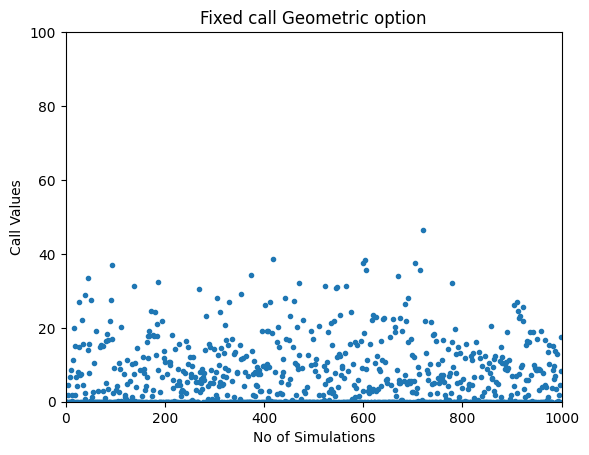

In [7]:
print('Fixed_call_Geometric',(Fixed_call_Geometric/simulation)*discounting_factor)
print('Standard error Fixed_call_Geometric',np.std(list(data_Fixed_call.values()))/np.sqrt(simulation))
myplots(data_Fixed_call,simulation,'Fixed call Geometric option',no_of_simulations,call_values)

Floating_call_Geometric 6.384564439002063
Standard error Floating_call_Geometric 0.3012729450974103


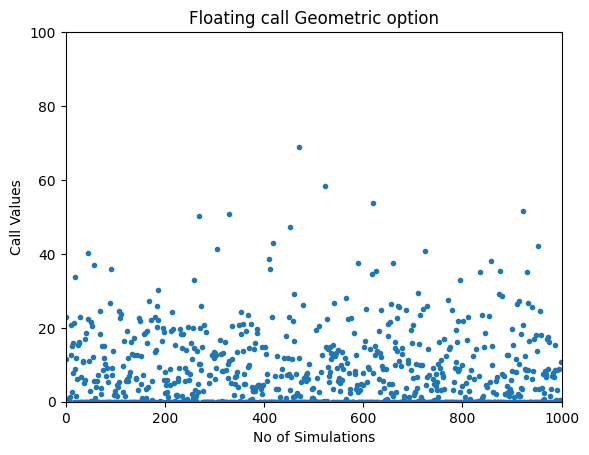

In [9]:
print('Floating_call_Geometric',(Floating_call_Geometric/simulation)*discounting_factor)
print('Standard error Floating_call_Geometric',np.std(list(data_Floating_call.values()))/np.sqrt(simulation))
myplots(data_Floating_call,simulation,'Floating call Geometric option',no_of_simulations,call_values)

Fixed_put_Geometric 3.516306584492029
Standard error Fixed_put_Geometric 0.18249685045636424


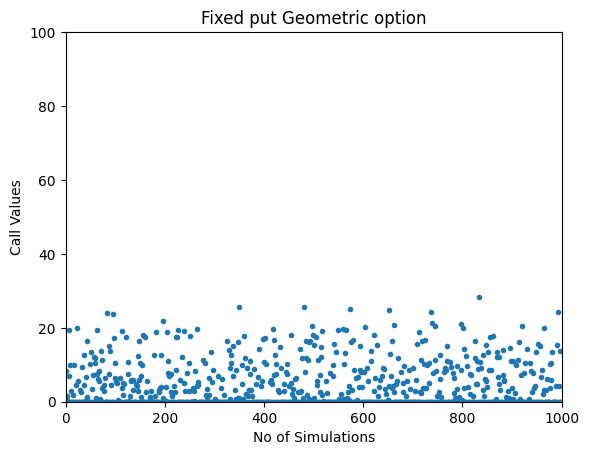

In [11]:
print('Fixed_put_Geometric',(Fixed_put_Geometric/simulation)*discounting_factor)
print('Standard error Fixed_put_Geometric',np.std(list(data_Fixed_put.values()))/np.sqrt(simulation))
myplots(data_Fixed_put,simulation,'Fixed put Geometric option',no_of_simulations,call_values)

Floating_put_Geometric 3.1762830602721452
Standard error Floating_put_Geometric 0.17230360162311112


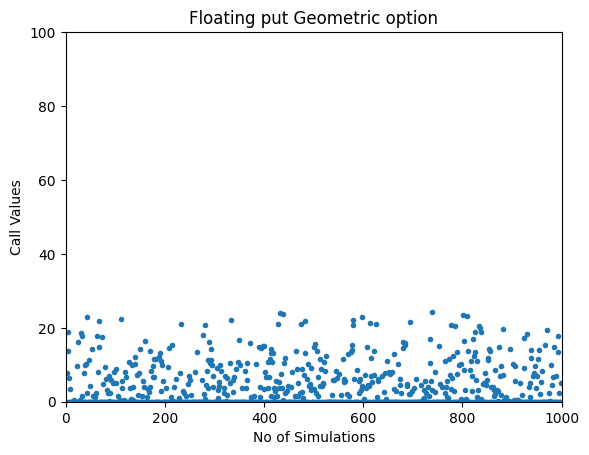

In [13]:
print('Floating_put_Geometric',(Floating_put_Geometric/simulation)*discounting_factor)
print('Standard error Floating_put_Geometric',np.std(list(data_Floating_put.values()))/np.sqrt(simulation))
myplots(data_Floating_put,simulation,'Floating put Geometric option',no_of_simulations,call_values)